<h1>Table of Contents<span class="tocSkip"></span></h1>

# 1. Post-Covid Era

The purpose of our analysis is to visualize the economic shock of Covid-19 and ultimately to provide meaningful insights for industry forecast under the unprecedented pandemic era. Thus, it is important to look into not only the consumption trend in industry but the recovery speed of industry. To compute the impact in each industry, we introduce two indices; 

1. Risk Index: Indication of how "much" the consumption of one industry has increased/decreased in the *expansion period*
2. Resilience Index: Indication of how "fast" the consumption of one industry has increased/decreased in the *stable period* 

With these two indices, we will create a matrix that categorizes industry forecast into four types. 

## 1.1 Load Data

## 1.2 Daily Confirmed Patients

In [1]:
import pandas as pd
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from datetime import datetime
from math import sqrt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
font_location = 'C:/WINDOWS\/Fonts\/H2GSRB.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
from adjustText import adjust_text
from translation import koren_to_english

In [2]:
time = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/KT_data_20200717/COVID_19/Time.csv')
time['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in time['date']] # Change string to datetime object for better visualization
daily =[0] + [x - y for x,y in zip(time['confirmed'][1:],time['confirmed'])] # Number of daily confirmed patients
time['daily'] = daily

In [3]:
time

,date,time,test,negative,confirmed,released,deceased,daily
0,2020-01-20,16,1,0,1,0,0,0
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1
...,...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282,39
159,2020-06-27,0,1243780,1211261,12653,11317,282,51
160,2020-06-28,0,1251695,1219975,12715,11364,282,62
161,2020-06-29,0,1259954,1228698,12757,11429,282,42


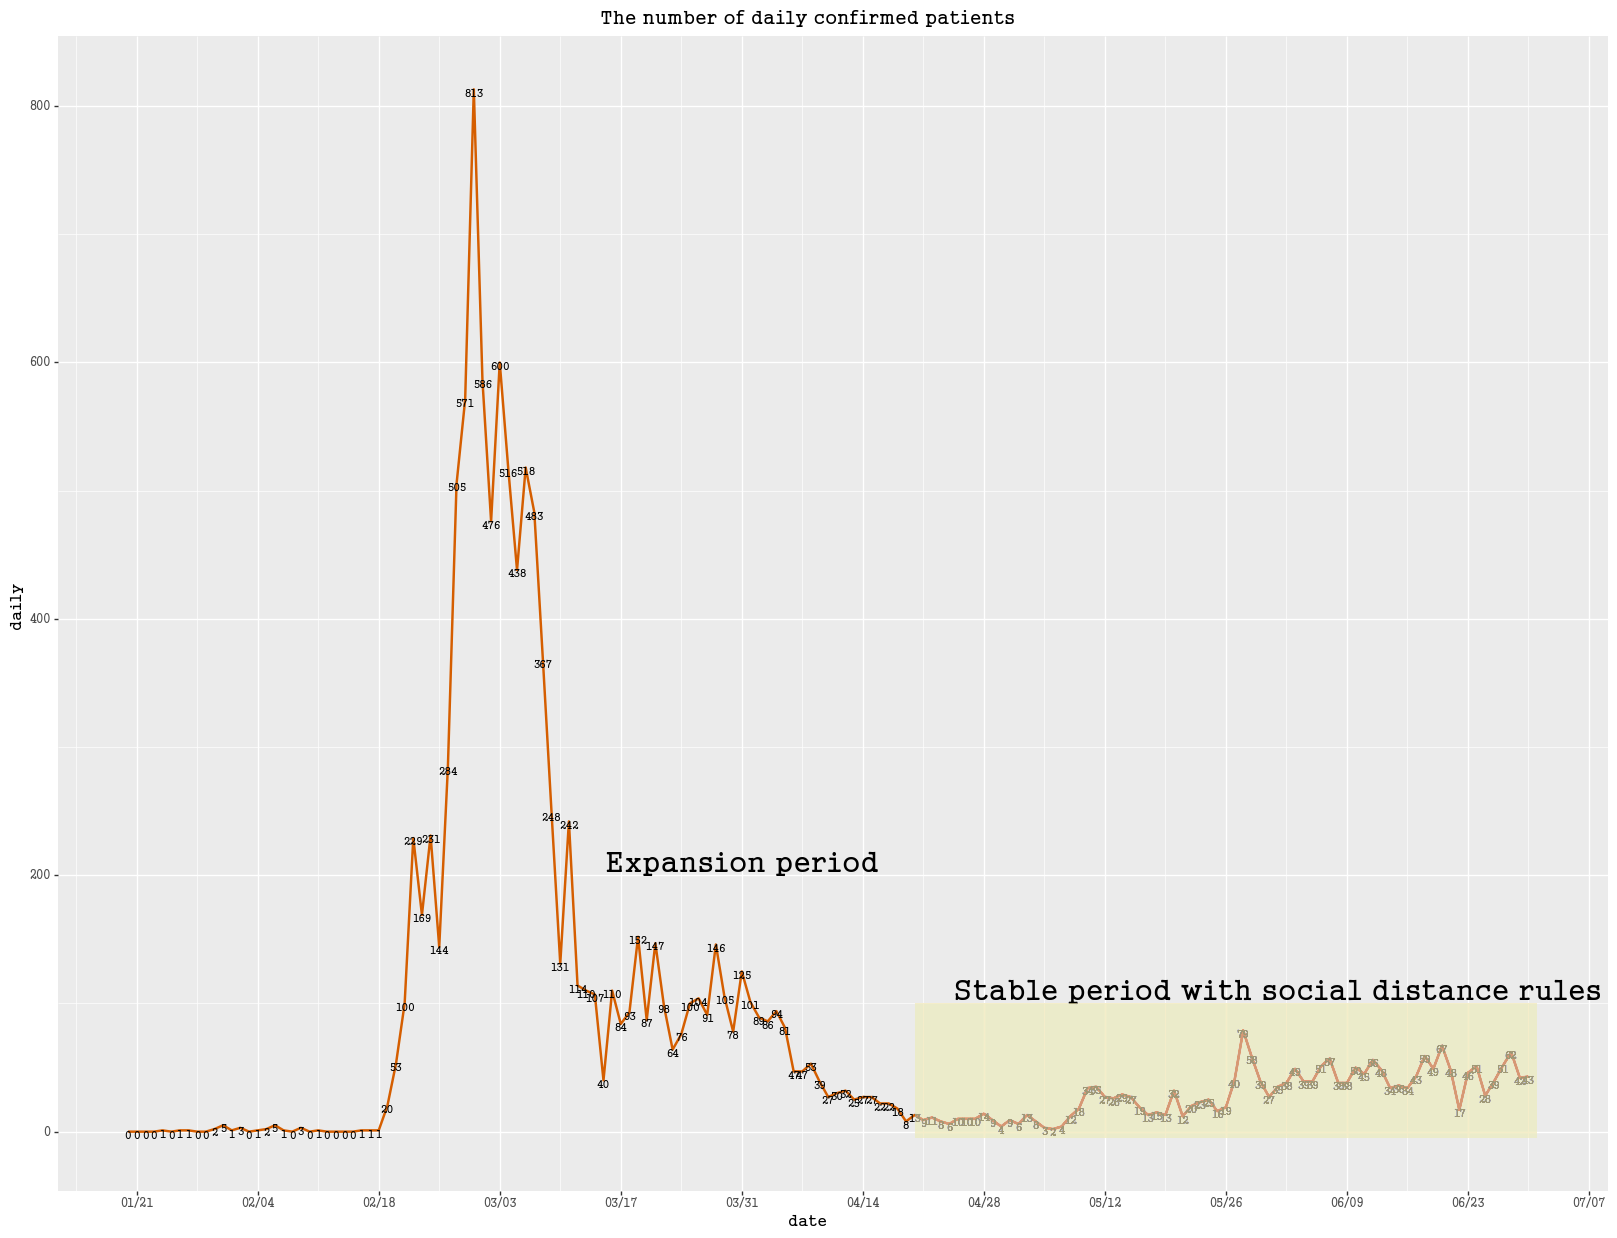

<ggplot: (-9223371926093593844)>

In [4]:
(ggplot(data=time,mapping=aes(x='date',y='daily',group=1))
+geom_line(color='#D55E00',size=1)
+ggtitle("The number of daily confirmed patients")
+scale_x_date(labels=date_format('%m/%d'),breaks=date_breaks('2 weeks'))
+theme(figure_size=(20,15),text=element_text(family=font_name))
+geom_text(aes(x='date',label='daily'),va='top',nudge_y=1,size =8)
+annotate(geom='text',x=datetime.strptime('2020-06-01','%Y-%m-%d'),y=100,label='Stable period with social distance rules',va='bottom',size=20)
+geom_rect(mapping=aes(xmin=datetime.strptime('2020-04-20','%Y-%m-%d'),
              xmax = datetime.strptime('2020-07-01','%Y-%m-%d'),
              ymin=-5,ymax=100),fill ='#F4EDCA',alpha=0.01)
+annotate(geom='text',x=datetime.strptime('2020-03-31','%Y-%m-%d'),y=200,label='Expansion period',va='bottom',size=20)
)

### 1.3 Card Sales Data

In [5]:
card = pd.read_csv("C:/Users/jieun/Desktop/Covid_Analysis/KT_data_20200717/card_20200717.csv")
card

,date_receipt,district_code,district_name,industry_code,industry_name,sales_count,sales_amount
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3713947,20200614,1121586000,구의2동,4004,대형할인점,136,1195640
3713948,20200614,1121584700,자양4동,9010,인테 리어,2,13100
3713949,20200614,1162052500,보라매동,6140,주 차 장,2,14500
3713950,20200614,1135056000,월계1동,9998,기타전문점,1,38000


In [6]:
tot=len(card['industry_name'].unique())
print("The total number of the type of industry is", tot)

The total number of the type of industry is 260


In [7]:
col = list(set(card['industry_name']))
col.sort()

In [8]:
category = ['숙박업','숙박업','방송','홈쇼핑','연료','송금','상품권','패션','가전','가전','요식','건강','건강','건축','서비스',
'운송','잡화','스포츠','스포츠','스포츠','공공요금','공공요금','매점/편의점','설비','관광','교육','매점/편의점','자동차','자동차',
'패션','설비','관광','교육','교육','운송','가구','건강','건축','설비','운송','농업','서비스','스포츠','보험','유통',
'문구','문구','기타','숙박업','연료','서비스','유통','요식','의료','의류','자동차','잡화','기기','기타','주방','의류',
'회원제','회원제','회원제','회원제','회원제','의류','기기','유흥','농업','식품','식품','유흥','의류','스포츠','교육',
'대형할인점','교육','동물','스포츠','스포츠','렌트','의류','면세점','문구','문화','미용','식품','미용','예술','법률','법률','의료',
'보관창고','교육','인테리어','스포츠','부동산','부동산','비영리','농업','기타','비영리','사무','사무','사무','사무','개인',
'사우나','서비스','의료','상품권','상품권','보험','요식','문구','잡화','자동차','생활','컴퓨터','보험','스포츠','문화','자동차',
'대형마트','스포츠','식품','스포츠','스포츠','스포츠','패션','패션','잡화','의류','예술','패션','패션','마사지','동물','약국',
'잡화','운송','문구','문화','교육','의류','의류','문구','교육','면세점','방송','급식업','설비','연료','교육','교육','교육(해외)',
'유흥','설비','의료','의료','미용','통신','자동차','건강','인터넷쇼핑','인터넷쇼핑','인터넷쇼핑','인테리어','가구','문구',
'백화점','요식','요식','자동차','자동차','자동차','자동차','백화점','기타','장례','연료','문구','상우회','상품권(전자상)',
'상품권(전자상)','가전','식품','정기간행물','정보','의류','패션','식품','의료','가전','의료','조세','조세','스포츠','의료',
'용역','연료','자동차','주류','주방','주방','주점','자동차','자동차','요식','건축','운송','가구','교육','총포류','인쇄','의료',
'의료','생활','문화','자동차','카지노','주점','의류','컴퓨터','교육','숙박업','운송','운송','스포츠','통신','통신','통신','통신',
'통신','통신','통신','통신','숙박업','문화','인테리어','매점/편의점','미용','예술','교육','교육','의료','의료','의료','요식',
'항공','스포츠','혼례','혼례','건강','예술','문화','미용','유통','예술']

In [9]:
d= {} 
for i in range(260):
    d[col[i]] = category[i]

In [10]:
# Mapping (전처리)
sales = card.groupby(['industry_name','date_receipt']).sum()['sales_amount'].reset_index()
sales.industry_name = sales.industry_name.replace(d)
sales.date_receipt = [datetime.strptime(str(x),'%Y%m%d').month for x in sales.date_receipt]
sales = sales.groupby(['industry_name','date_receipt']).sum()['sales_amount'].reset_index()
sales = sales[sales.date_receipt !=6]
remove = ['공공요금','개인','기타','비영리','상우회','정보','회원제','총포류','카지노','송금','조세','농업','설비']
sales = sales[~sales.industry_name.isin(remove)]
sales = sales.rename(columns={"industry_name":"industry","date_receipt": "month"})

So far, we narrowed down 260 industries to 72 industries, and summed up the monthly sales data via groupby.<br>

We removed the following data:
* Data which does not exist from January to May (Example: Casino, Transfer, Gun)
* June data as there is no data after 14th June 
* Data without clear label (Example: etcetra)
* Data without a direct relation with consumer (Example: Nonprofit organization) 
* Data with strong seasonality (Example: Agriculture)

Now we have a new dataframe with __60 industries__.

In [11]:
sales

,industry,month,sales_amount
0,가구,1,2734031138
1,가구,2,5263670744
2,가구,3,7350019593
3,가구,4,7444856482
4,가구,5,10090247588
...,...,...,...
415,홈쇼핑,1,21671234046
416,홈쇼핑,2,27959045287
417,홈쇼핑,3,49946896911
418,홈쇼핑,4,43336918164


In [12]:
sales.industry.unique()

array(['가구', '가전', '건강', '건축', '관광', '교육', '교육(해외)', '급식업', '기기', '대형마트',
       '대형할인점', '동물', '렌트', '마사지', '매점/편의점', '면세점', '문구', '문화', '미용',
       '방송', '백화점', '법률', '보관창고', '보험', '부동산', '사무', '사우나', '상품권',
       '상품권(전자상)', '생활', '서비스', '숙박업', '스포츠', '식품', '약국', '연료', '예술',
       '요식', '용역', '운송', '유통', '유흥', '의료', '의류', '인쇄', '인터넷쇼핑', '인테리어',
       '자동차', '잡화', '장례', '정기간행물', '주류', '주방', '주점', '컴퓨터', '통신', '패션',
       '항공', '혼례', '홈쇼핑'], dtype=object)

In [13]:
# Translate Korean into English

sales['industry'] = sales['industry'].replace(koren_to_english)

In [14]:
sales = sales.sort_values(by=['industry'], ascending=True)
sales = sales.groupby(['industry','month']).sum()['sales_amount'].reset_index()
sales

,industry,month,sales_amount
0,Accommodation,1,26253778923
1,Accommodation,2,26592140344
2,Accommodation,3,18943493793
3,Accommodation,4,18790248780
4,Accommodation,5,25641821153
...,...,...,...
295,Wedding,1,1433530790
296,Wedding,2,3295640429
297,Wedding,3,2277332163
298,Wedding,4,2872910094


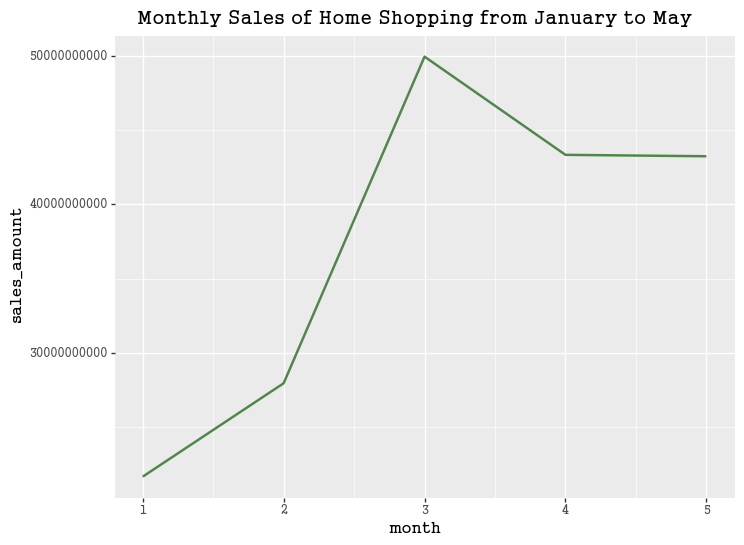

<ggplot: (-9223371926091300372)>

In [15]:
(ggplot(sales[sales.industry=='Home shopping'])
+geom_line(aes(y='sales_amount',x='month',group='industry'),color='#52854C',size=1)
+ggtitle('Monthly Sales of Home Shopping from January to May')
+theme(figure_size=(8,6),text=element_text(family=font_name))
)

### 1.4 Naver Shopping Insight

Naver, often referred to as 'Google of South Korea', is a Korean online platform with the comprehensive search engine. Naver features a broad range of services from e-mail, news, and blog to the world's first online Q&A platform. Here, **we will use data from 'Naver Shopping Insight' which provides shopping data based on the amount of user's click.** Note that this data is __supplementary data__ (not main data) to verify our analysis. This is because 1) this data is difficult to categorize by industry and 2) they mainly consists of online purchasable goods

Data source: https://datalab.naver.com/shoppingInsight/sCategory.naver (availalbe as csv file)

In [16]:
health_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/health.csv')
rent_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/rental_car.csv')
tour_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/overseas_tour.csv')
duty_naver = pd.read_csv('C:/Users/jieun/Desktop/Covid_Analysis/naver/duty_free.csv')

In [17]:
health_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in health_naver['date']]
rent_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in rent_naver['date']]
tour_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in tour_naver['date']]
duty_naver['date'] = [datetime.strptime(x,'%Y-%m-%d') for x in duty_naver['date']]

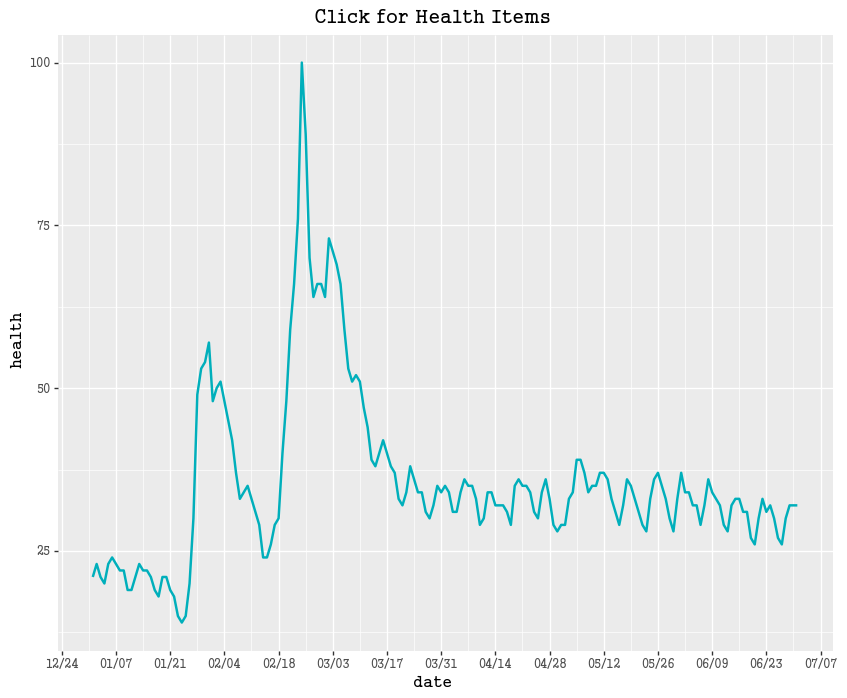

<ggplot: (-9223371926091262128)>

In [18]:
(ggplot(data=health_naver,mapping=aes(x='date',y='health',group=1))
+geom_line(color='#00AFBB',size=1)
+ggtitle("Click for Health Items")
+scale_x_date(labels=date_format('%m/%d'),breaks=date_breaks('2 weeks'))
+theme(figure_size=(10,8),text=element_text(family=font_name))
)

# 2. Risk Index

The risk index shows how *much* the consumption of one industry has changed in the Covid *expansion period*. As we have seen in the figure 1, we consider January to March as the expansion period. The equation of the risk index is as follows.

\begin{equation}
Risk Index = \sqrt{(R_1+1)(R_2+1)}-1
\end{equation}

The index is calculated by the geometric mean of $R_1$ and $R_2$, the rates of change in consumption from January to February and from February to March respectively. We use the geometric mean because we see the rates of change in consumption from the perspective of *return*. In finance, the return rate is generally calcualted with the geometric mean. Although it may not seem intuitive, this calculation is effective since it captures the continuity of the change in the return with the compounding rate assumption and reflects loss.**


** Levy H., Stochastic Dominance: Investment Decision Making under Uncertainty, 356-365, 2015

In [19]:
sales_tmp = sales.copy()
sales_tmp.loc[sales.sales_amount<0,'sales_amount'] = 1e-6 
# To avoid ValueError, we convert negative values to 1e-6, which is almost equivalent to 0. 

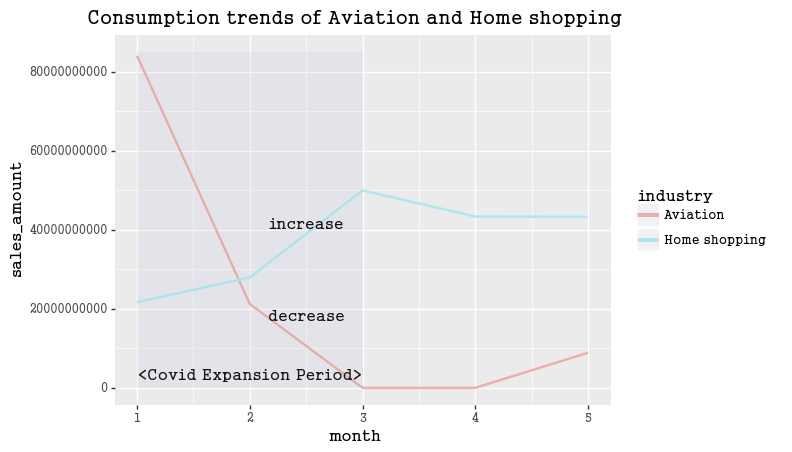

<ggplot: (-9223371926091258968)>

In [20]:
(ggplot(sales_tmp[sales_tmp.industry.isin(['Aviation','Home shopping'])])
+geom_line(aes(x='month',y= 'sales_amount',group='industry',color='industry'),size=1)
+theme(text=element_text(family=font_name))
+annotate(geom='text',x=2.5,y=20000000000,label='decrease',va='top') 
+annotate(geom='text',x=2.5,y=40000000000,label='increase',va='bottom')
+annotate(geom='text',x=2,y=5000000000,label='<Covid Expansion Period>',va='top') 
+ggtitle('Consumption trends of Aviation and Home shopping')
+geom_rect(mapping=aes(xmin=1,xmax =3, ymin=0,ymax=85000000000),fill ='#E3E4EA',alpha=0.01)
+scale_colour_hue(l=0.8)
)

The figure presents the contrast movements of aviation and home shopping industries. With the risk index, we can quantify this consumption trend. A positive risk index means a decrease in consumption while a negative value indicates an increase in consumption. 

In [21]:
# Risk Index 
industry = sales[sales.month==2]['industry']
risk1 = [x/y for x,y in zip(sales_tmp[sales_tmp.month==2]['sales_amount'],sales_tmp[sales_tmp.month==1]['sales_amount'])]
risk2 = [x/y for x,y in zip(sales_tmp[sales_tmp.month==3]['sales_amount'],sales_tmp[sales_tmp.month==2]['sales_amount'])]
risk_data = pd.DataFrame({'industry':industry,'risk_1':risk1,'risk_2':risk2})
risk_data['risk_index'] = [sqrt(x*y)-1 for x,y in zip(risk_data.risk_1,risk_data.risk_2)]

In [22]:
risk_data

,industry,risk_1,risk_2,risk_index
1,Accommodation,1.012888,7.123719e-01,-0.150557
6,Administration,1.054045,1.071339e+00,0.062657
11,Animal,1.682437,1.487372e+00,0.581901
16,Architecture,1.673405,1.437885e+00,0.551182
21,Art,1.157998,9.773245e-01,0.063833
26,Aviation,0.252435,4.714793e-17,-1.000000
31,Bar,0.730141,1.266683e+00,-0.038305
36,Beauty,0.786636,1.239045e+00,-0.012742
41,Broadcasting,10.362705,1.053337e+00,2.303850
46,Car,1.845396,2.429369e+00,1.117344


## 2.1 Risk Index Overview of All Industries

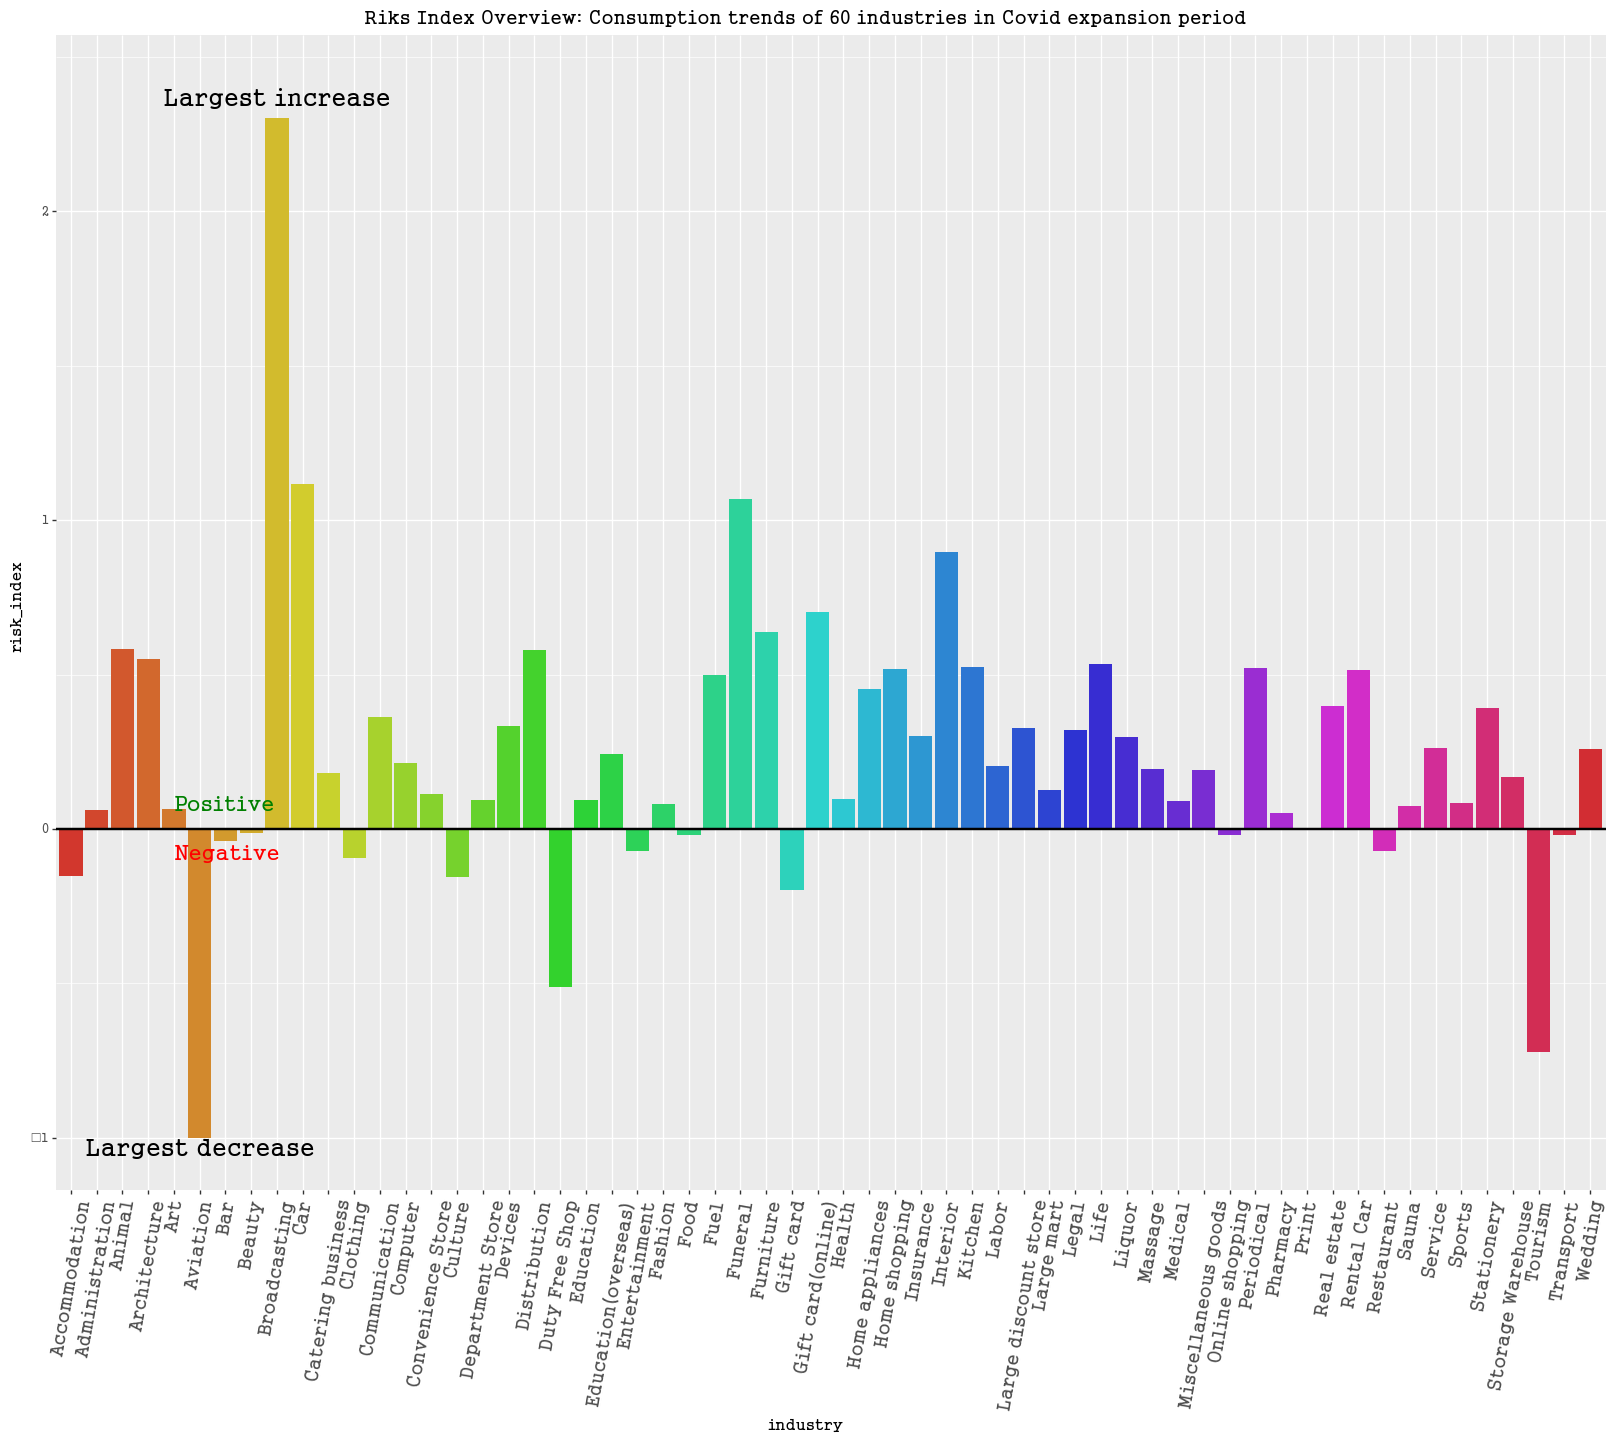

<ggplot: (-9223371926091162940)>

In [23]:
(ggplot(data=risk_data, mapping=aes(x='industry', y='risk_index'))
+geom_bar(stat='identity', mapping = aes(fill='industry'), show_legend=False)
+theme(text=element_text(family=font_name))
+theme(figure_size=(20,15),axis_text_x=element_text(size=13,angle=80))
+geom_hline(yintercept=0, size=1)
+annotate(geom='text', x=5, y=0.05, label='Positive', va='bottom', ha='left', size=15, color='green')
+annotate(geom='text', x=5, y=-0.05, label='Negative', va='top', ha='left', size=15, color='red')
+annotate(geom='text', x='Broadcasting', y=2.4, label='Largest increase', va='top', size=17)
+annotate(geom='text', x='Aviation', y=-1, label='Largest decrease', va='top', size=17)
+ggtitle('Riks Index Overview: Consumption trends of 60 industries in Covid expansion period') 
+scale_fill_hue(l=0.5)
)

The figure shows the interesting result that the consumptions in most industries have increased. The broadcasting industry has the largest increase in the covid expansion period. However, except the boradcasting, the fuel, and the funeral industry, the increment of the consumption is small for most industries since their Risk Index is less than 1. On the other hand, we can see a few industries with decreasing consumptions. In particular, the Risk Index of the aviation industry is -1, which means its growth rate of the consumption is -100%.

## 2.2 Industry with the positive Risk Index (increase in sales)

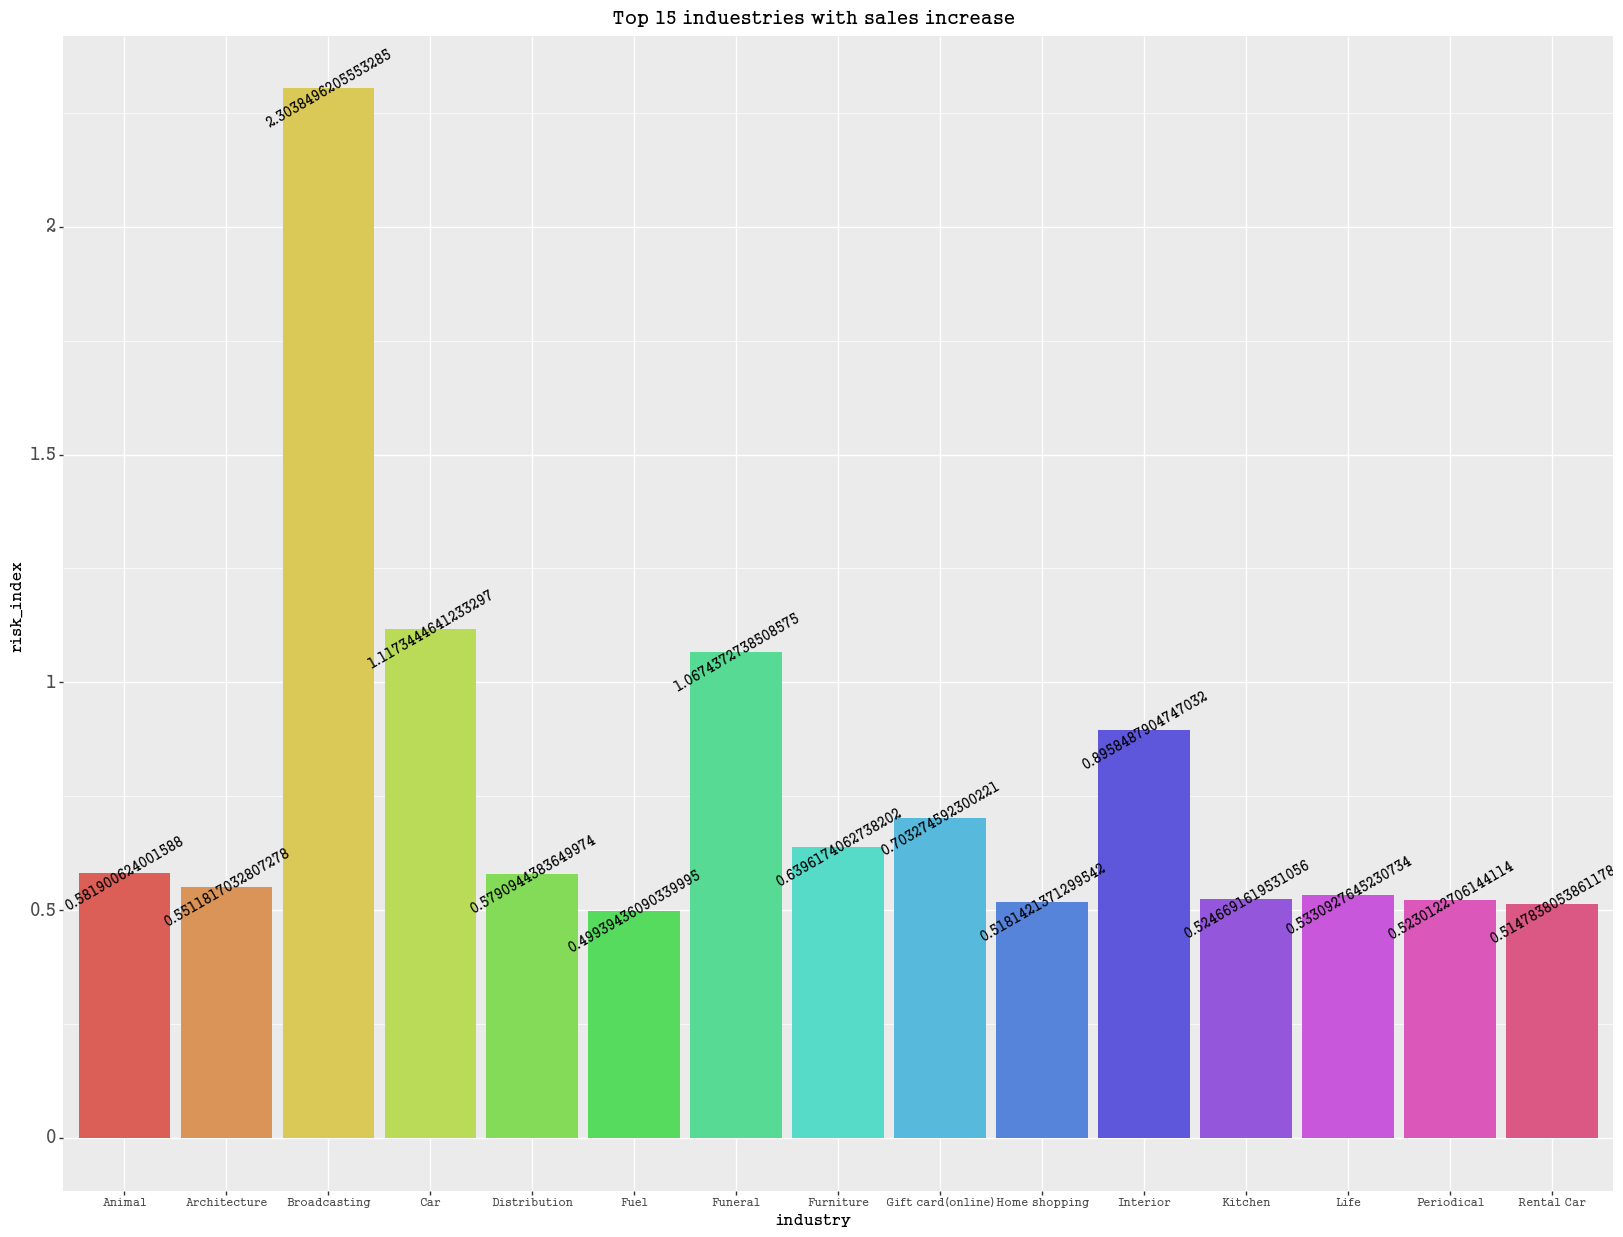

<ggplot: (-9223371926090844956)>

In [24]:
(ggplot(data=risk_data.nlargest(15,'risk_index'), mapping=aes(x='industry',y='risk_index'))
+geom_bar(stat='identity', mapping=aes(fill='industry'), show_legend=False)
+theme(text=element_text(family=font_name))
+theme(figure_size=(20,15), axis_text_x=element_text(size=8), axis_text_y=element_text(size=13))
+geom_text(aes(x='industry',y='risk_index',label='risk_index'),size=10,angle=30)
+ggtitle('Top 15 induestries with sales increase')
+scale_fill_hue(l=0.6)
)

Overall, the top 15 industries have the Risk Index over 0.5 except the fuel industry. The top 3 industries with the risk index over 1  (the broadcasting, the car, and the fuel industry), experienced the huge growth with the average growth rate more than 100%. As these 15 industries show distinctive characters, we will further explore the industries by using time series data under three keywrods:<br/> **1) Home industry, 2) Contact-free industry, 3) Car industry** 

### 2.2.1 Home alone industry: Staying home insutry

In [25]:
data=risk_data.nlargest(15,'risk_index')
data

,industry,risk_1,risk_2,risk_index
41,Broadcasting,10.362705,1.053337,2.303850
46,Car,1.845396,2.429369,1.117344
131,Funeral,2.601591,1.642955,1.067437
171,Interior,2.589026,1.388260,0.895849
146,Gift card(online),0.956897,3.031827,0.703275
136,Furniture,1.925242,1.396368,0.639617
11,Animal,1.682437,1.487372,0.581901
91,Distribution,1.862160,1.339058,0.579094
16,Architecture,1.673405,1.437885,0.551182
201,Life,1.238974,1.897032,0.533093


In [35]:
# Three Keywords
home = ['Furniture','Kitchen','Interior','Life','Periodical','Broadcasting']
untact = ['Distribution','Home shopping','Gift card(online)']
car = ['Rental Car','Car','Fuel']

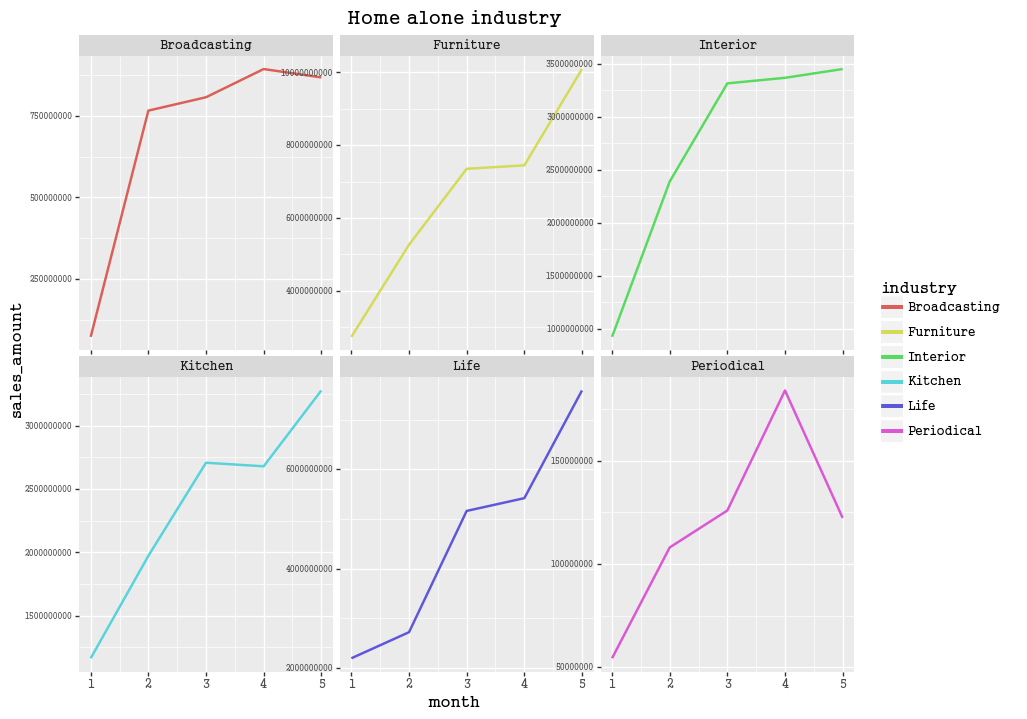

<ggplot: (-9223371926091109840)>

In [46]:
(ggplot(data=sales[sales.industry.isin(home)],mapping=aes(x='month',y= 'sales_amount',group='industry',color='industry'))
+geom_line(size=1)
+theme(text=element_text(family=font_name),axis_text_y=element_text(size=6),figure_size=(10,8))
+facet_wrap('industry',scales='free')
+ggtitle('Home alone industry')
+scale_colour_hue(l=0.6)
)

With the government's social distancing rule, the "home-related" industries such as the furniture and the kitchen have been benefited with the rapid growth of the sales amount. The rise of the consumption in the periodical and the broadcasting implies that people started looking for indoor activities as they need to spend more time at home. 

### 2.2.2 Untact industry: Contact-free consumption

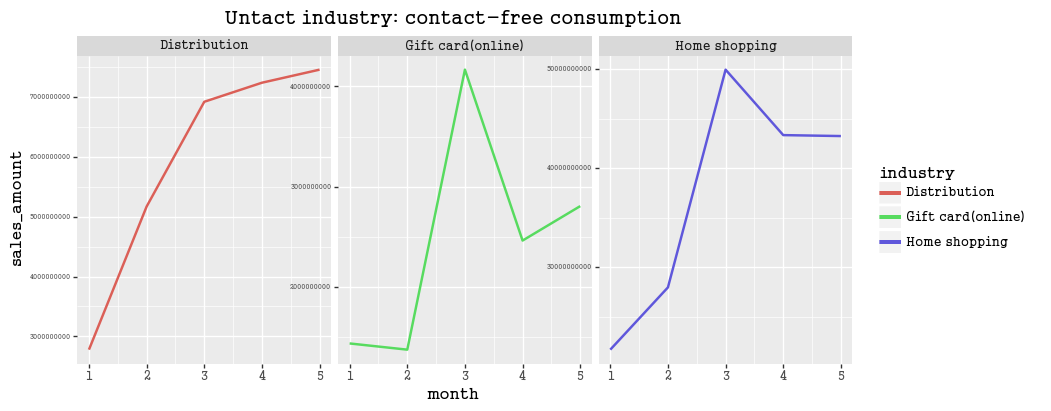

<ggplot: (-9223371926091260116)>

In [51]:
(ggplot(data=sales[sales.industry.isin(untact)],mapping=aes(x='month',y= 'sales_amount',group='industry',color='industry'))
+geom_line(size=1)
+theme(text=element_text(family=font_name),axis_text_y=element_text(size=5),figure_size=(10,4))
+facet_wrap('industry',scales='free')
+ggtitle('Untact industry: contact-free consumption')
+scale_color_hue(l=0.6))

Since the spread of Covid-19, the terminology "Untact" has become the popular buzzword in Korea, coined for the meaning of "No Contact" or "Zero Contact". Indeed, the pandamic has affected diverse aspects of everyday life of people. The growing concern about face-to-face activities led to thriving of contact-free transactions, so-called "untact trasactions". Instead of going to supermarkets or department stores, people tend to choose safer options such as online shopping. This phenomenon is well-described in the figure. The steep rise in the sales of the home shopping can be correlated with the distribution and the online gift card industry. The expansion of the distribution industry can be attributed to the high volume of delivery for untact shopping.

### 2.2.3 Car industry

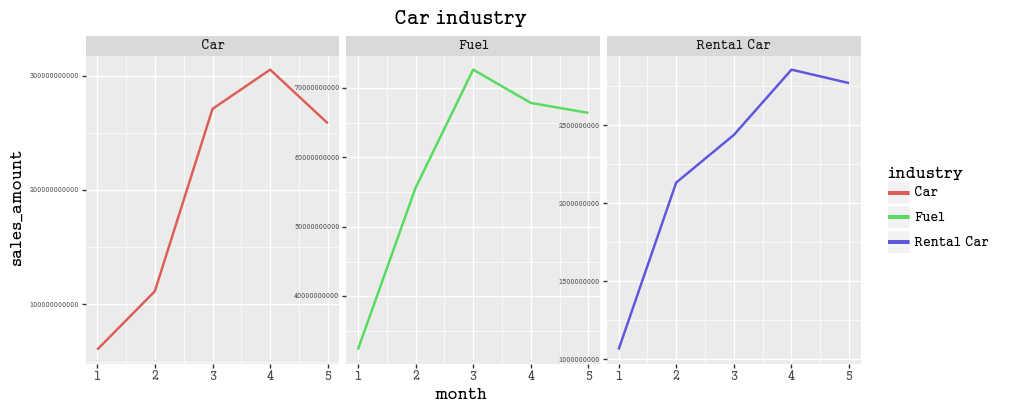

<ggplot: (-9223371926088298856)>

In [50]:
(ggplot(data=sales[sales.industry.isin(car)],mapping=aes(x='month',y= 'sales_amount',group='industry',color='industry'))
+geom_line(size=1)
+theme(text=element_text(family=font_name),axis_text_y=element_text(size=5),figure_size=(10,4))
+facet_wrap('industry',scales='free')
+ggtitle('Car industry')
+scale_color_hue(l=0.6))